![insomnia](insomnia.jpg)


# SleepInc: Helping you find better sleep 😴

## 📖 Background

Your client is SleepInc, a sleep health company that recently launched a sleep-tracking app called SleepScope. The app monitors sleep patterns and collects users' self-reported data on lifestyle habits. SleepInc wants to identify lifestyle, health, and demographic factors that strongly correlate with poor sleep quality. They need your help to produce visualizations and a summary of findings for their next board meeting! They need these to be easily digestible for a non-technical audience!

## 💾 The data

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

In [1]:
import pandas as pd
data = pd.read_csv('sleep_health_data.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 💪 Challenge

Leverage this sleep data to analyze the relationship between lifestyle, health, demographic factors, and sleep quality. Your goal is to identify factors that correlate with poor sleep health.

Some examples:

- Examine relationships between several factors like gender, occupation, physical activity, stress levels, and sleep quality/duration. Create visualizations to present your findings.
- Produce recommendations on ways people can improve sleep health based on the patterns in the data.
- Develop an accessible summary of study findings and recommendations for improving sleep health for non-technical audiences.

## 🧑‍⚖️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing into the competition

- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## Data Overview

In [2]:
# Import the Necessary Packages 
import numpy as np
import pandas as pd

### Data Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# Let's look at the unique variables for the categorical variables
print(data['Gender'].unique())
print('-'* 50)
print(data['Occupation'].unique())
print('-'* 50)
print(data['BMI Category'].unique())
print('-'* 50)
print(data['Sleep Disorder'].unique())

['Male' 'Female']
--------------------------------------------------
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
--------------------------------------------------
['Overweight' 'Normal' 'Obese' 'Normal Weight']
--------------------------------------------------
['None' 'Sleep Apnea' 'Insomnia']


In [5]:
# Let's fix the Blood Pressure Column
data[['Systolic', 'Diastolic']
           ] = data['Blood Pressure'].str.split('/', expand=True)

data['Systolic'] = data['Systolic'].astype('int')
data['Diastolic'] = data['Diastolic'].astype('int')
data.drop('Blood Pressure', axis=1, inplace=True)

print(data.head())

   Person ID Gender  Age  ... Sleep Disorder  Systolic  Diastolic
0          1   Male   27  ...           None       126         83
1          2   Male   28  ...           None       125         80
2          3   Male   28  ...           None       125         80
3          4   Male   28  ...    Sleep Apnea       140         90
4          5   Male   28  ...    Sleep Apnea       140         90

[5 rows x 14 columns]


In [6]:
# Fixing the BMI Column
data['BMI Category'] = data['BMI Category'].replace(['Normal Weight'],'Normal')
print(data['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


### Data Summary

In [7]:
# Data Summary for Numeric Variables
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0
Systolic,374.0,128.553476,7.748118,115.0,125.00,130.0,135.00,142.0
Diastolic,374.0,84.649733,6.161611,75.0,80.00,85.0,90.00,95.0


In [8]:
# Data Summary for Categorical Variables
data.describe(exclude=np.number).T

,count,unique,top,freq
Gender,374,2,Male,189
Occupation,374,11,Nurse,73
BMI Category,374,3,Normal,216
Sleep Disorder,374,3,None,219


**Observations:**
* Majority of the numeric variables have a normal distribution, which means majority of the people in the dataset are closer to the average in all their sleep indicators
* Majority of the dataset DO NOT HAVE a sleep disorder, with Normal BMI, Nurse being the largest occupation, as well as Male being the top in the gender

## Data Analysis

In [9]:
# Importing the Necessary Datasets
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import plotly.graph_objects as go

# Remove the Person ID from the Dataset
df = data.copy()
df = df.drop('Person ID', axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Univariate Analysis

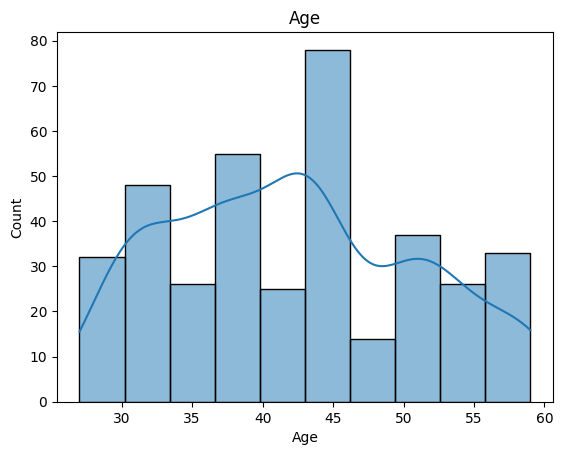

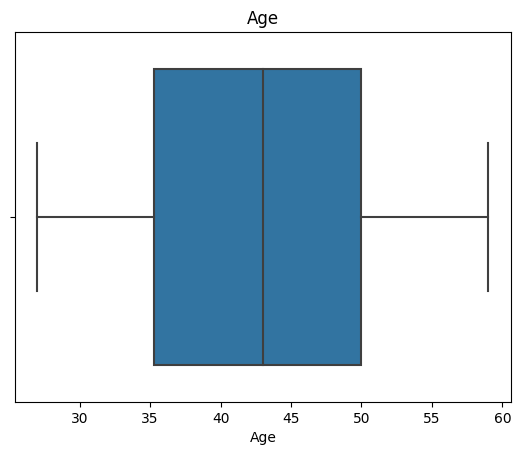

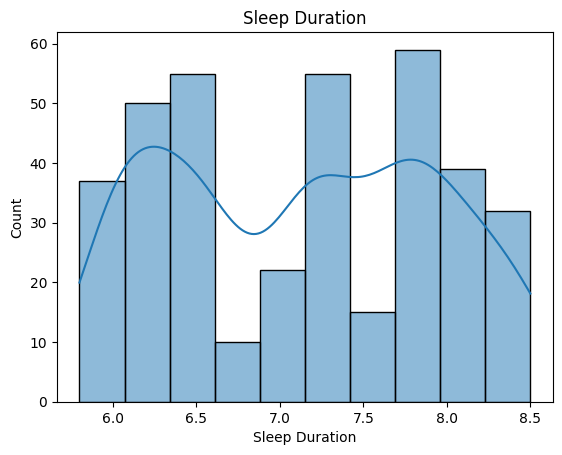

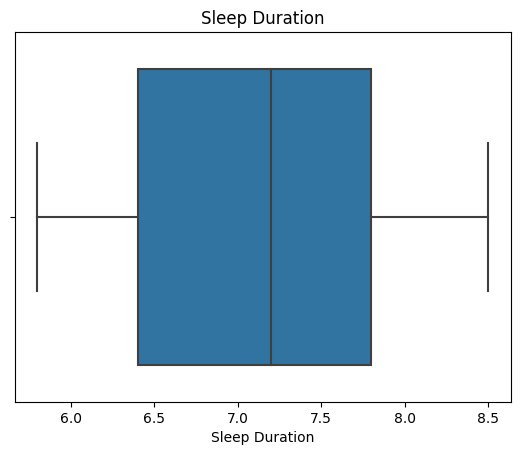

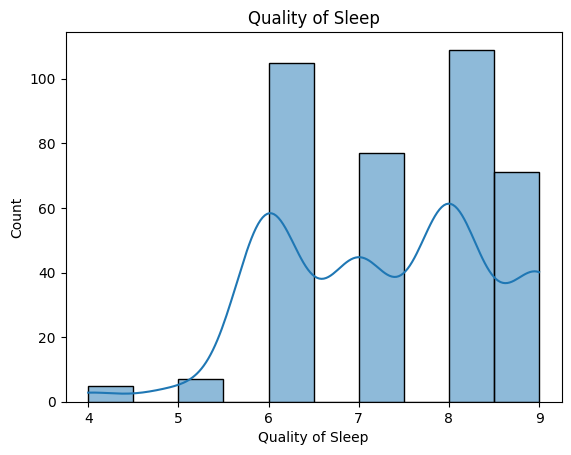

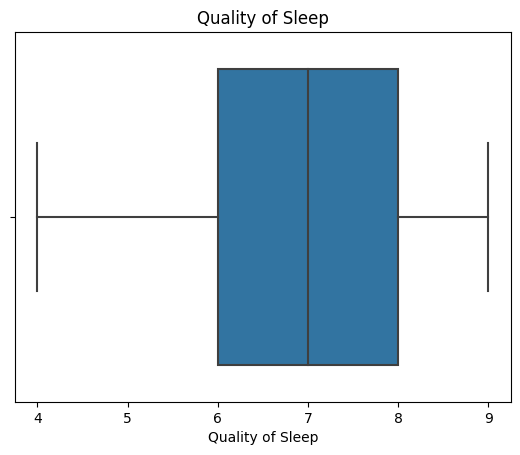

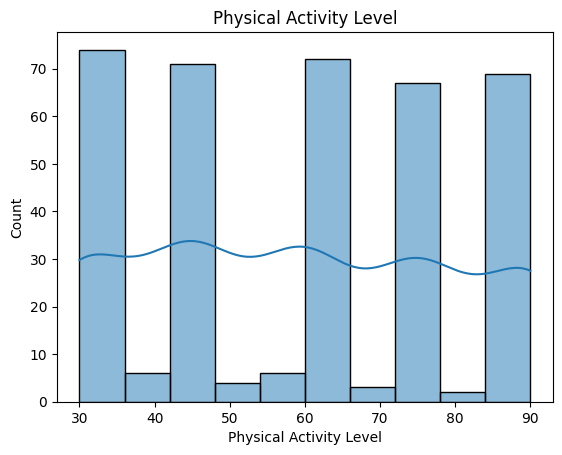

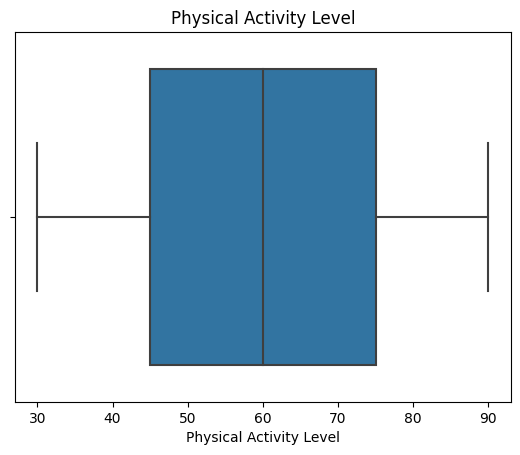

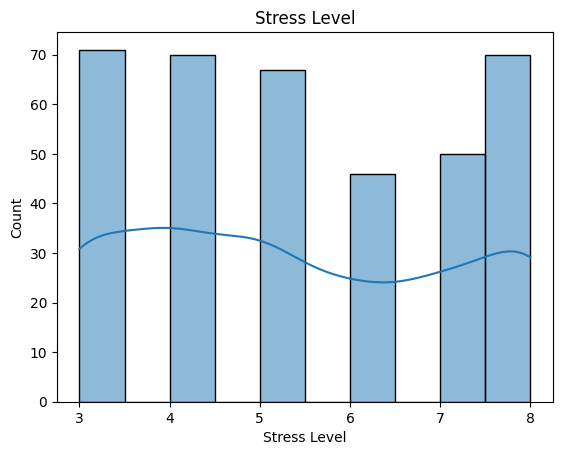

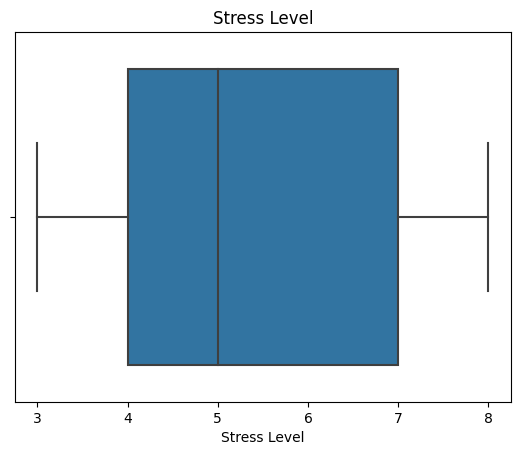

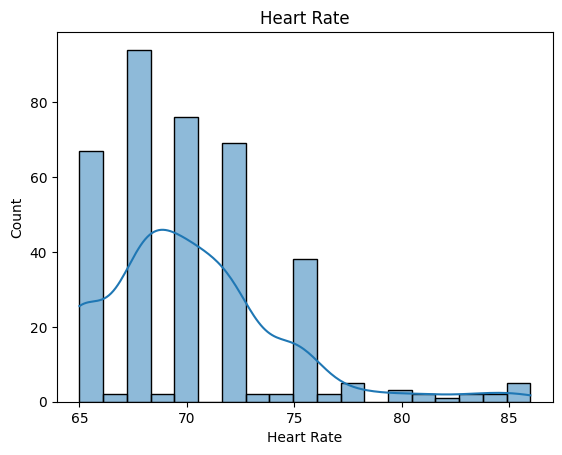

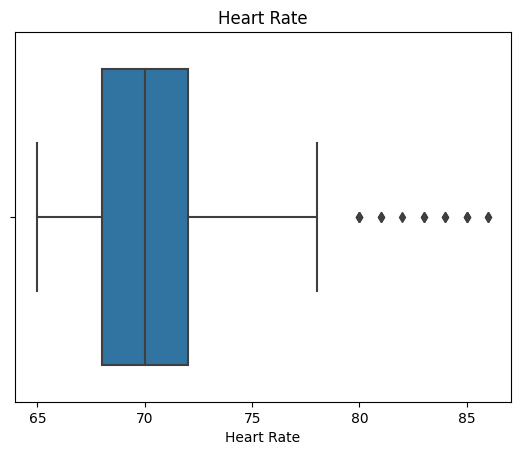

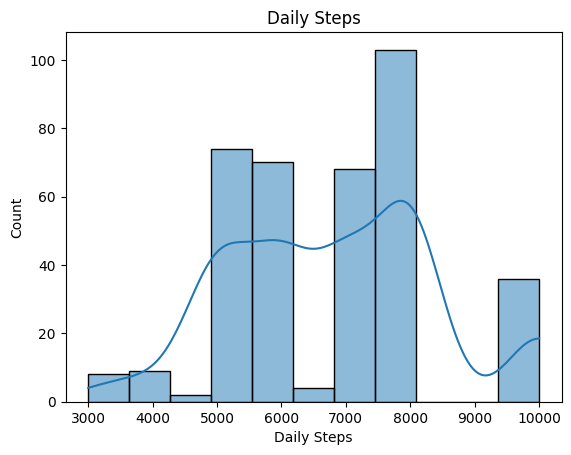

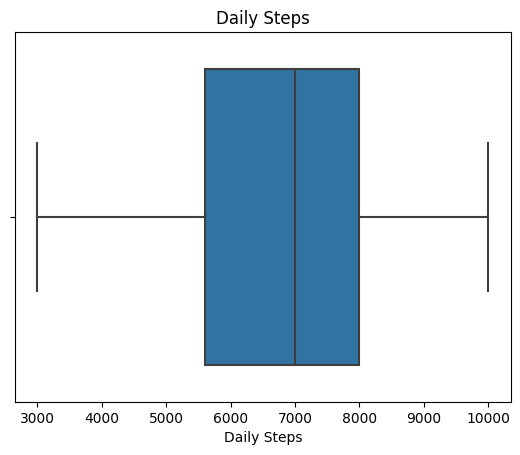

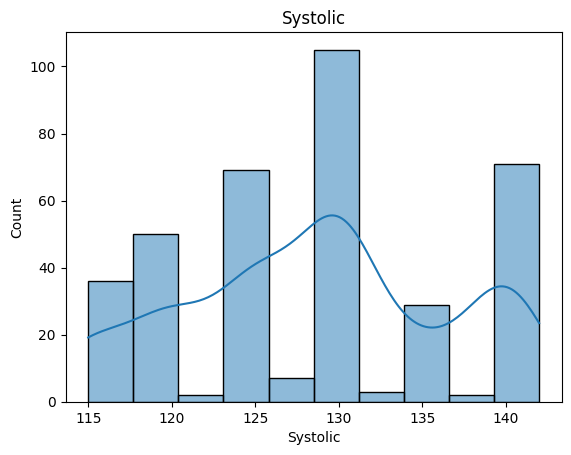

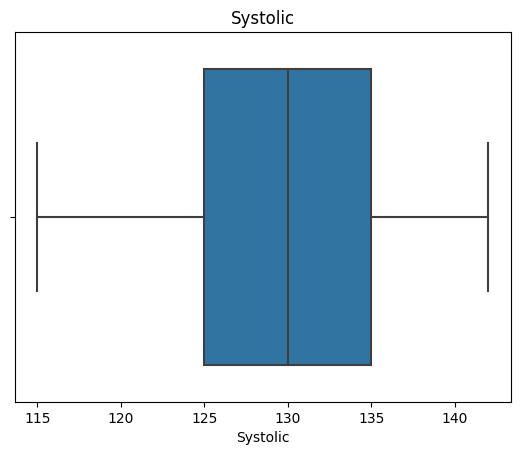

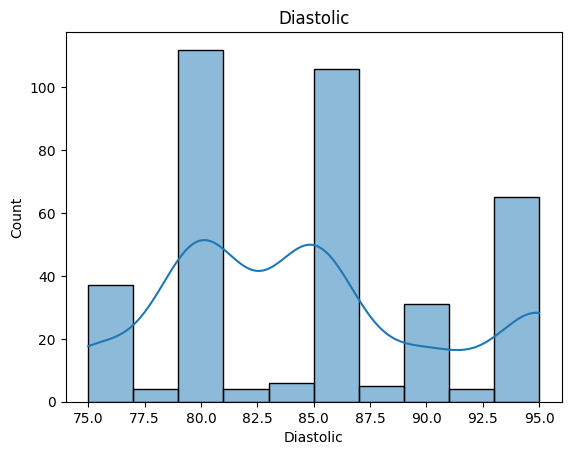

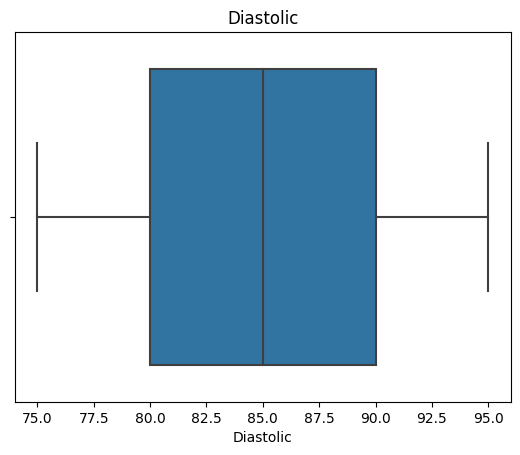

In [10]:
# Looking at the numeric variables first
numerical = df.select_dtypes(include=np.number).columns.tolist()

for num in numerical:
    # Histogram
    sns.histplot(df[numerical], x=num, kde=True)
    plt.title(num)
    plt.show()
    
    # Boxplot
    sns.boxplot(df[numerical],x=num)
    plt.title(num)
    plt.show()

In [11]:
# Looking at the variable for Sleep Disorders
fig = go.Figure(data=[go.Pie(labels=df['Sleep Disorder'].value_counts().index,
                             values=df['Sleep Disorder'].value_counts())])
fig.update_layout(title= 'Sleep Disorder')
fig.show()

### Bivariate Analysis 

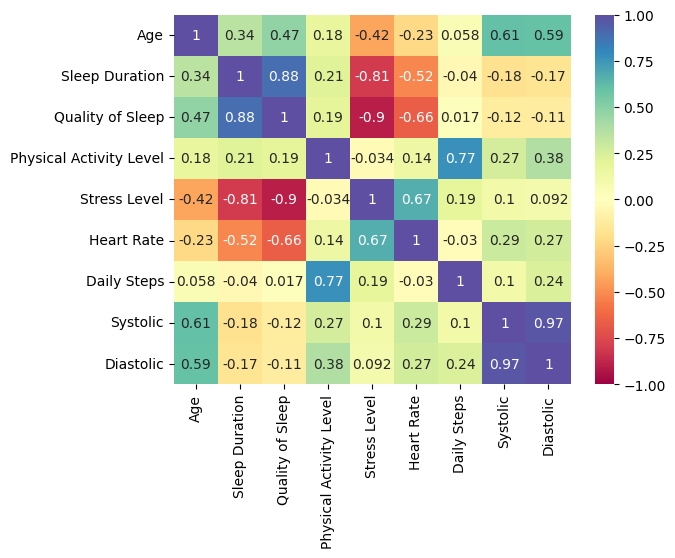

<Figure size 2000x1500 with 0 Axes>

In [12]:
## Let's create a heatmap to determine the correlations among the numerical variables
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.figure(figsize=(20, 15))
plt.show()

**Observations**
* Quality of Sleep has a high positive correlation among sleep duration, negative strong correlation among Stress Level, and negative strong relationship with heart rate
* Stress Level and Sleep Duration have a negative correlation with each other

### Demographic Factors

In [13]:
# Function for Graph Creation
def stacked_barplot(df, predictor, target):
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Gender                Female  Male  All
Occupation                             
All                      185   189  374
Nurse                     73     0   73
Accountant                36     1   37
Teacher                   35     5   40
Engineer                  32    31   63
Scientist                  4     0    4
Doctor                     2    69   71
Lawyer                     2    45   47
Manager                    1     0    1
Sales Representative       0     2    2
Salesperson                0    32   32
Software Engineer          0     4    4
------------------------------------------------------------------------------------------------------------------------


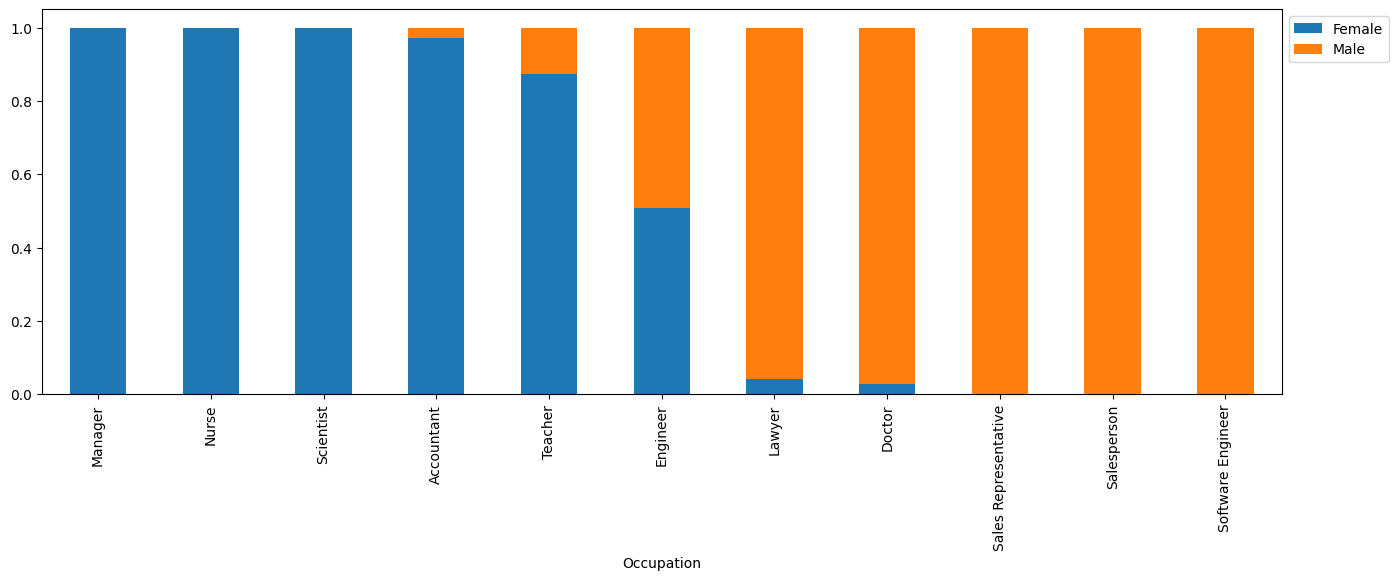

In [14]:
# Occupation Based on Gender
stacked_barplot(df, 'Occupation','Gender')

Sleep Disorder  Insomnia  None  Sleep Apnea  All
Gender                                          
All                   77   219           78  374
Male                  41   137           11  189
Female                36    82           67  185
------------------------------------------------------------------------------------------------------------------------


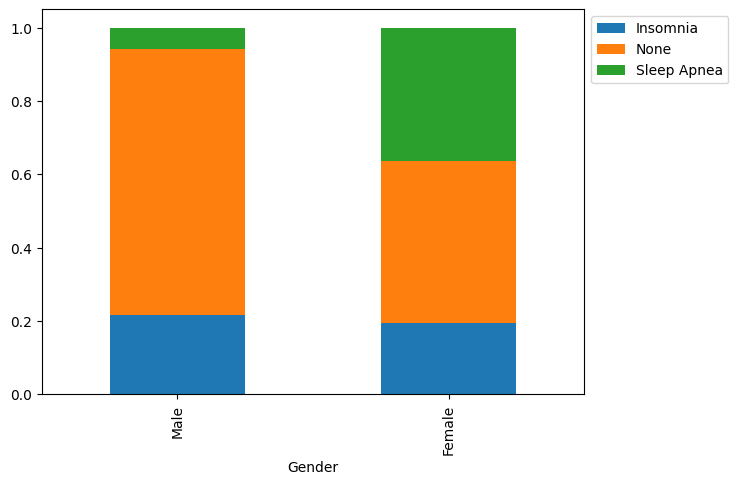

In [15]:
# Gender Based on Sleep Disorder
stacked_barplot(df, 'Gender','Sleep Disorder')

Sleep Disorder        Insomnia  None  Sleep Apnea  All
Occupation                                            
All                         77   219           78  374
Salesperson                 29     2            1   32
Teacher                     27     9            4   40
Accountant                   7    30            0   37
Engineer                     5    57            1   63
Doctor                       3    64            4   71
Nurse                        3     9           61   73
Lawyer                       2    42            3   47
Software Engineer            1     3            0    4
Manager                      0     1            0    1
Sales Representative         0     0            2    2
Scientist                    0     2            2    4
------------------------------------------------------------------------------------------------------------------------


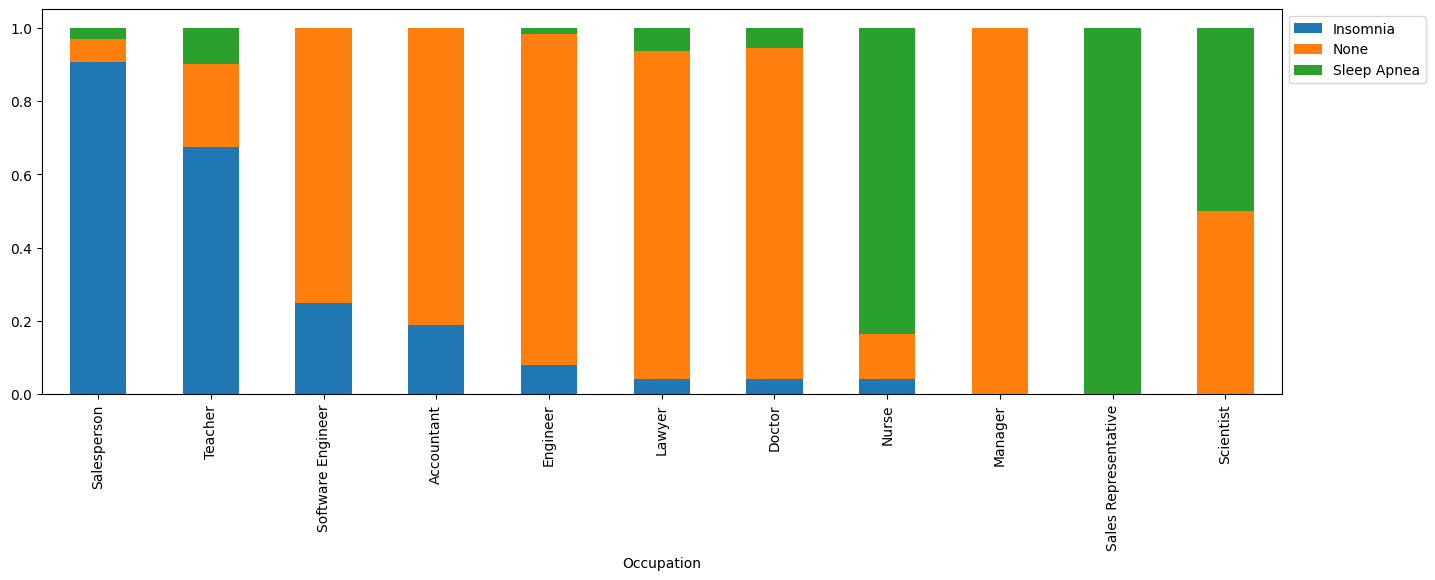

In [16]:
# Occupation Based on Sleep Disorder
stacked_barplot(df, 'Occupation','Sleep Disorder')

Sleep Disorder  Insomnia  None  Sleep Apnea  All
BMI Category                                    
All                   77   219           78  374
Overweight            64    19           65  148
Normal                 9   200            7  216
Obese                  4     0            6   10
------------------------------------------------------------------------------------------------------------------------


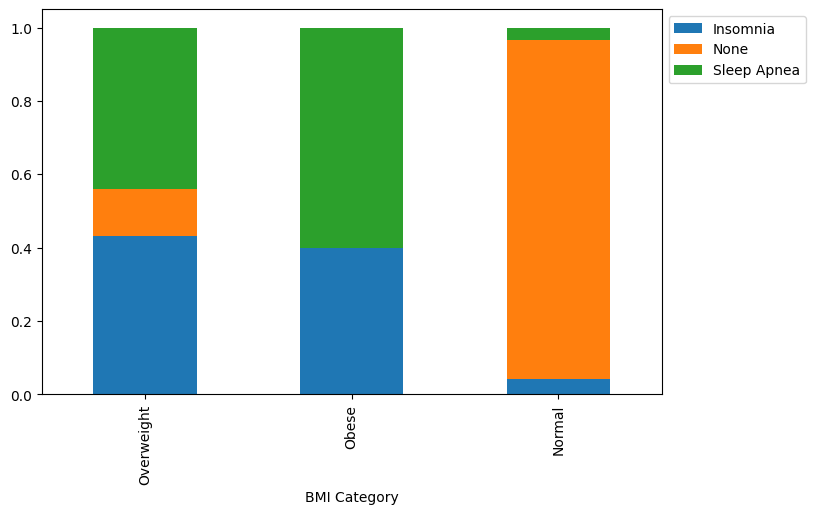

In [17]:
# BMI Based on Sleeping Disorder
stacked_barplot(df, 'BMI Category','Sleep Disorder')

Gender        Female  Male  All
BMI Category                   
All              185   189  374
Overweight       106    42  148
Normal            78   138  216
Obese              1     9   10
------------------------------------------------------------------------------------------------------------------------


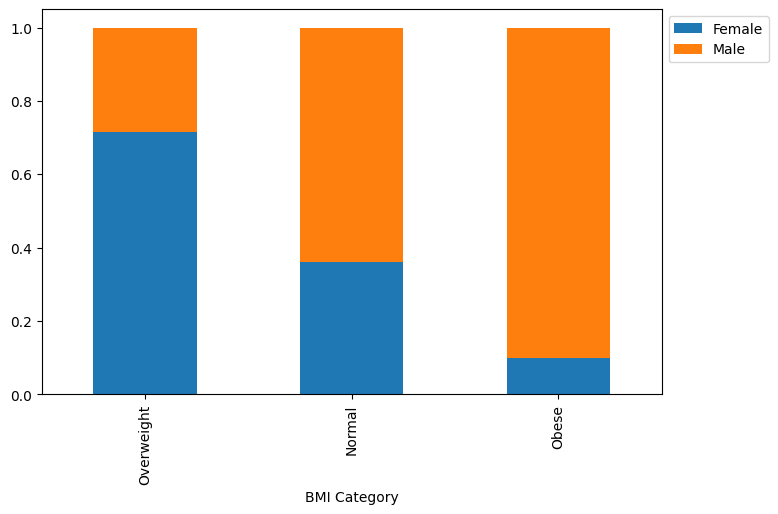

In [18]:
# BMI Category Based on Gender
stacked_barplot(df, 'BMI Category','Gender')

BMI Category          Normal  Obese  Overweight  All
Occupation                                          
All                      216     10         148  374
Doctor                    67      4           0   71
Lawyer                    43      2           2   47
Sales Representative       0      2           0    2
Software Engineer          2      1           1    4
Teacher                    6      1          33   40
Accountant                31      0           6   37
Engineer                  60      0           3   63
Manager                    0      0           1    1
Nurse                      7      0          66   73
Salesperson                0      0          32   32
Scientist                  0      0           4    4
------------------------------------------------------------------------------------------------------------------------


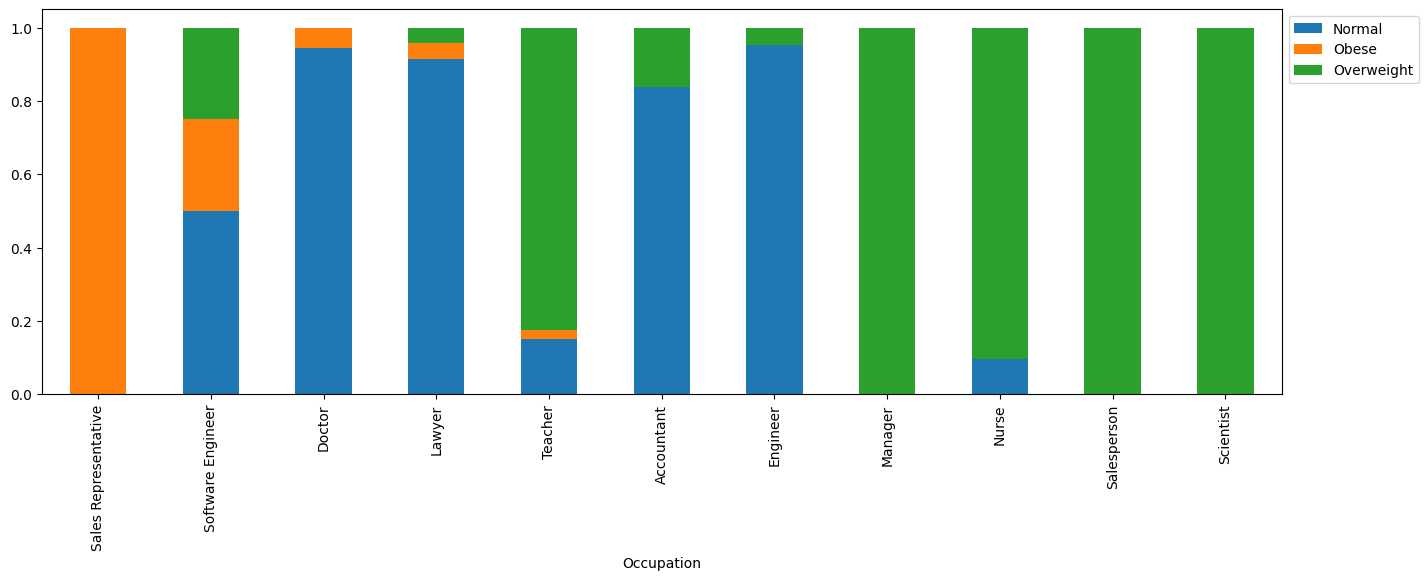

In [19]:
# BMI Based on Occupation
stacked_barplot(df, 'Occupation','BMI Category')

In [20]:
def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

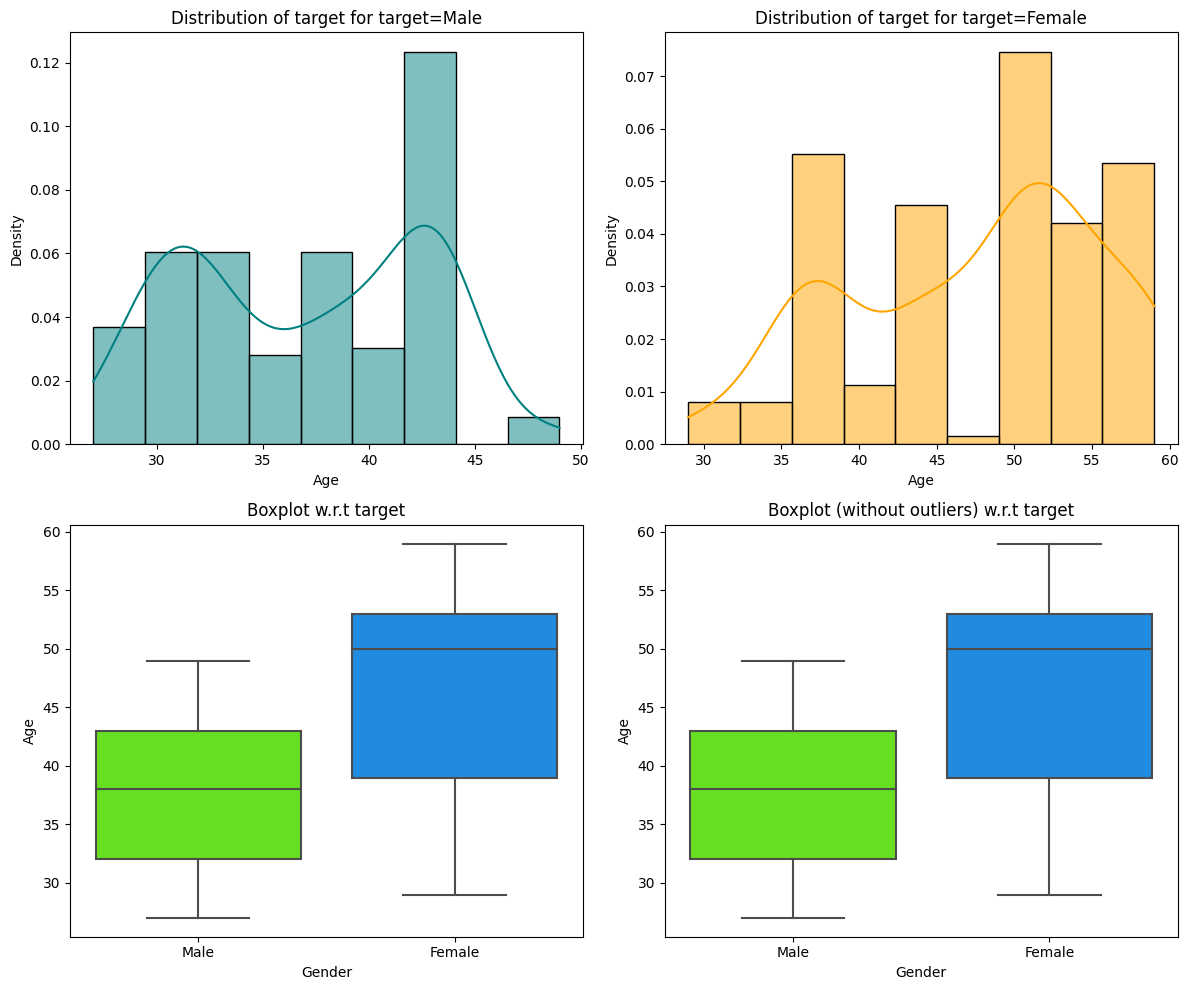

In [21]:
# Age and Gender 
distribution_plot_wrt_target(df,'Age','Gender')

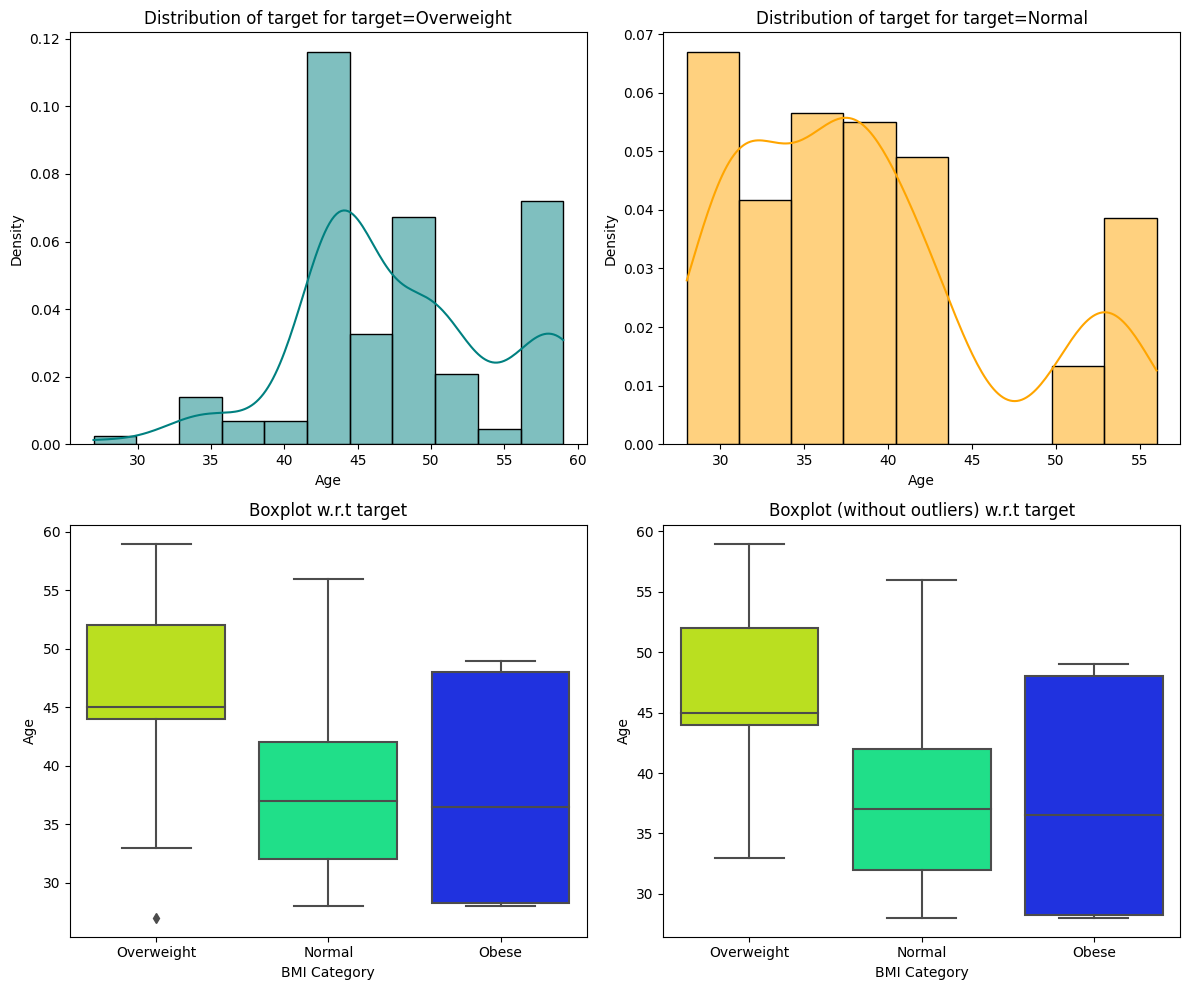

In [22]:
# Age and BMI 
distribution_plot_wrt_target(df,'Age','BMI Category')

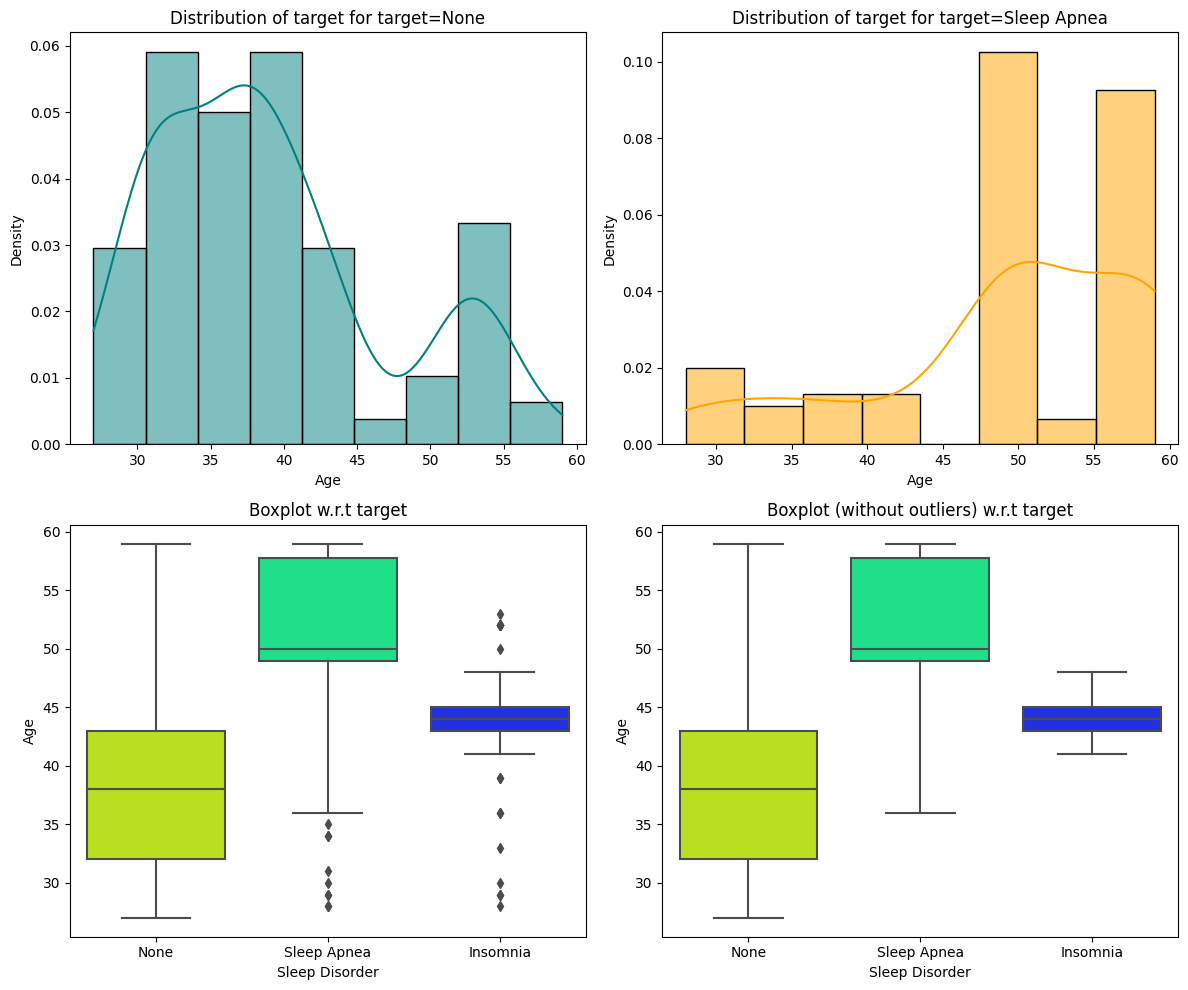

In [23]:
# Age and Sleep Disorder
distribution_plot_wrt_target(df,'Age','Sleep Disorder')

**Observations:**
* Age does not show any dependency upon sleep disorders, besides the fact that isomnia age range is between the 40s and 50s, while sleep apnea is more spread out. Obesity is spread among different age groups, in which shows that Obesity may be an overall risk for sleep disorders
* Most sedentary jobs have the highest risk of sleep disorders, which is why there is variation among them, as well as obesity being higher among men, since their jobs are mostly desk jobs
* Women have the highest risk of getting sleep apnea

### Health Indicators

In [24]:
# Average Sleep Quality Demographic Factors
important_attributes = df.groupby(['Gender','Occupation','BMI Category','Sleep Disorder'])[['Age','Quality of Sleep']].mean().sort_values(by='Quality of Sleep').head(10)

# Highlighting max and min
important_attributes.style.highlight_max(color='lightgreen').highlight_min(color='lightcoral')

In [25]:
# Sleep Quality is Dependent upon Stress Factors, let's see which demographic factors contribute to high stress rates
stress_rates = df.groupby(['Gender','Occupation','BMI Category','Sleep Disorder'])[['Age','Stress Level']].mean().sort_values(by='Stress Level', ascending=False).head(10)

# Highlighting max and min
stress_rates.style.highlight_max(color='lightgreen').highlight_min(color='lightcoral')

In [26]:
# Heart Rate is Dependent upon Quality of Sleep, let's see which demographic factors contribute to high stress rates
heart_rates = df.groupby(['Gender','Occupation','BMI Category','Sleep Disorder'])[['Age','Heart Rate']].mean().sort_values(by='Heart Rate', ascending=False).head(10)

# Highlighting max and min
heart_rates.style.highlight_max(color='lightgreen').highlight_min(color='lightcoral')

In [27]:
# Sleep Duration is Dependent upon Quality of Sleep, let's see which demographic factors contribute to high stress rates
heart_rates = df.groupby(['Gender','Occupation','BMI Category','Sleep Disorder'])[['Age','Sleep Duration']].mean().sort_values(by='Sleep Duration', ascending=True).head(10)

# Highlighting max and min
heart_rates.style.highlight_max(color='lightgreen').highlight_min(color='lightcoral')

**Observations:**
* The Table shows across the many different demograpahics, specifically body mass and occupation cause a variation in different health indicators
* You can see that stress levels are higher among the sedentary jobs, specifically for obese and overweight people
    * Nurses and Doctors who are insomniacs have normal BMI, but their Isomnia can be from working long hours at night
* This is why heart rates climb and sleep duration falls

In [28]:
# Does BMI have relation with Sleeping Disorder
chi2_bmi = pg.chi2_independence(data=df,x='BMI Category',y='Sleep Disorder')
chi2_bmi

(Sleep Disorder   Insomnia        None  Sleep Apnea
 BMI Category                                      
 Normal          44.470588  126.481283    45.048128
 Obese            2.058824    5.855615     2.085561
 Overweight      30.470588   86.663102    30.866310,
 Sleep Disorder  Insomnia  None  Sleep Apnea
 BMI Category                               
 Normal                 9   200            7
 Obese                  4     0            6
 Overweight            64    19           65,
                  test    lambda        chi2  dof          pval    cramer  power
 0             pearson  1.000000  245.665344  4.0  5.588351e-52  0.573088    1.0
 1        cressie-read  0.666667  251.298536  4.0  3.418369e-53  0.579621    1.0
 2      log-likelihood  0.000000  280.597760  4.0  1.656186e-59  0.612479    1.0
 3       freeman-tukey -0.500000         NaN  4.0           NaN       NaN    NaN
 4  mod-log-likelihood -1.000000         inf  4.0  0.000000e+00       inf    1.0
 5              neyman -2.0

We can conclude that since the p-value is less than the 5% significance level, the association is statistically significant

In [29]:
# Does Occupation have a relation with Sleeping Disorder
chi2_occupation = pg.chi2_independence(data=df,x='Occupation',y='Sleep Disorder')
chi2_occupation

(Sleep Disorder         Insomnia       None  Sleep Apnea
 Occupation                                             
 Accountant             7.617647  21.665775     7.716578
 Doctor                14.617647  41.574866    14.807487
 Engineer              12.970588  36.890374    13.139037
 Lawyer                 9.676471  27.521390     9.802139
 Manager                0.205882   0.585561     0.208556
 Nurse                 15.029412  42.745989    15.224599
 Sales Representative   0.411765   1.171123     0.417112
 Salesperson            6.588235  18.737968     6.673797
 Scientist              0.823529   2.342246     0.834225
 Software Engineer      0.823529   2.342246     0.834225
 Teacher                8.235294  23.422460     8.342246,
 Sleep Disorder        Insomnia  None  Sleep Apnea
 Occupation                                       
 Accountant                   7    30            0
 Doctor                       3    64            4
 Engineer                     5    57            1
 La

We can conclude that since the p-value is less than the 5% significance level, the association is statistically significant

### Lifestyle Factors

<AxesSubplot: xlabel='Physical Activity Level', ylabel='Occupation'>

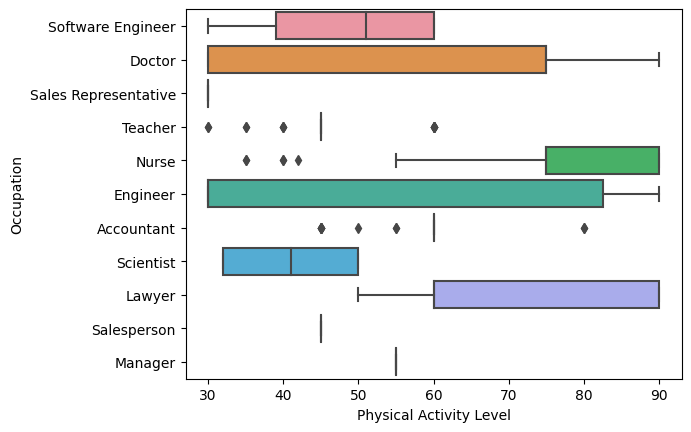

In [30]:
# Let's Look at the Physical Activity for Occupations
sns.boxplot(data=df,x='Physical Activity Level',y='Occupation')

<AxesSubplot: xlabel='Daily Steps', ylabel='Occupation'>

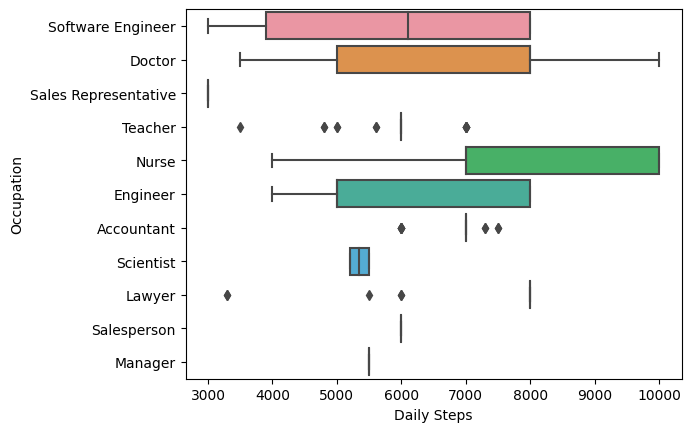

In [31]:
# Looking at the Daily Activity for Occupations
sns.boxplot(data=df,x='Daily Steps',y='Occupation')

As mentioned before that daily steps among office work must be low in which is why these jobs produce the most level of stress

<AxesSubplot: xlabel='Physical Activity Level', ylabel='BMI Category'>

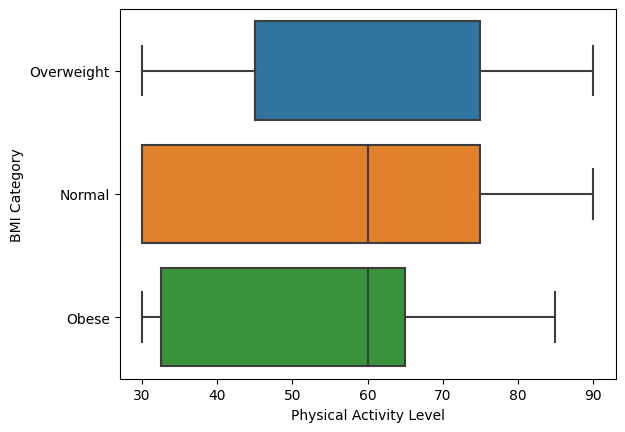

In [32]:
# Looking at the Physical Activity and BMI Category
sns.boxplot(data=df,x='Physical Activity Level', y='BMI Category')

<AxesSubplot: xlabel='Daily Steps', ylabel='BMI Category'>

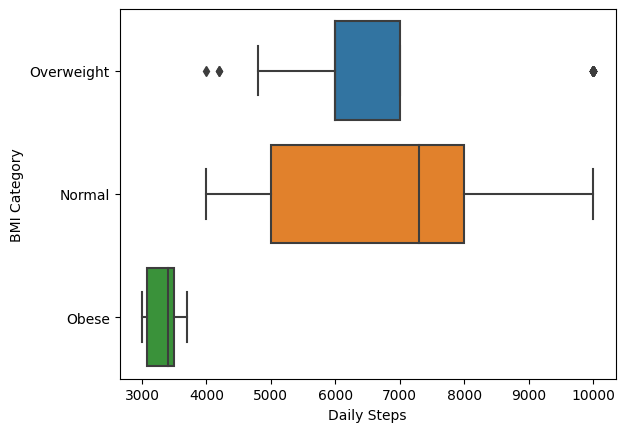

In [33]:
# Looking at the Daily Activity for BMI Category
sns.boxplot(data=df,x='Daily Steps',y='BMI Category')

We can see that Physical Activity Level is a biased measurement in terms that even with Sedentary jobs, you see some sort of movement in their 24 hour cycle, in which 60 is normal. However, daily step count is something that should be taken more seriously as this has a direct link to laziness, anything less than 5000 steps is considered dangerous

<AxesSubplot: xlabel='Quality of Sleep', ylabel='Daily Steps'>

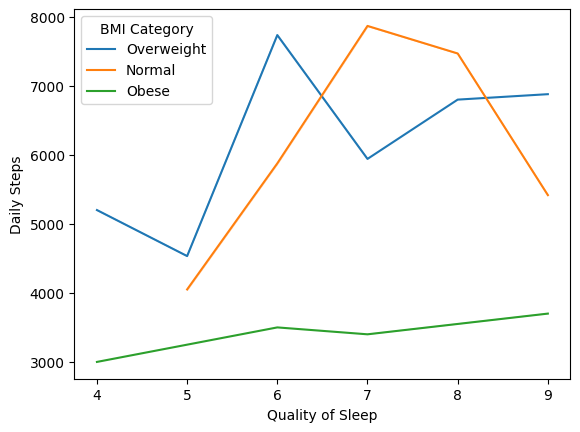

In [34]:
# Let's see what the relationship between daily steps and quality of sleep more closely
sns.lineplot(data=df,x='Quality of Sleep', y='Daily Steps',ci=False, hue='BMI Category')

This is why daily steps is more important. It can reduce stress and blood pressure. Causing better sleep quality

## Model Building

In [35]:
# Importing Necessary Packages for Data Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing Necessary Packages for Model Bulding and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

### Data Preprocessing

In [36]:
# Outlier Processing
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Heart Rate']>=upper)[0]
df = df.drop(index = upper_array)

In [37]:
# Making the Dummy Variables
df_dummies = pd.get_dummies(df, columns=['Gender','Occupation','BMI Category'], drop_first=True, dtype=int)

# Label Encoding the Sleep Disorder Variable
label_encoder = LabelEncoder()
df_dummies['Sleep Disorder'] = label_encoder.fit_transform(df_dummies['Sleep Disorder'])

# Creating the X and Y variable
X = df_dummies.drop('Sleep Disorder', axis=1)
y = df_dummies['Sleep Disorder']

# Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(283, 20)
(71, 20)
(283,)
(71,)


### Model Evaluation

In [38]:
# Accuracy for the Models
models = {'LogisticRegression':LogisticRegression(), 'DecisionTree':DecisionTreeClassifier(),'KNeighbors':KNeighborsClassifier(),'NaiveBayes':GaussianNB()}

for model in models.values():
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_train,y_train_pred))
    print(accuracy_score(y_test,y_pred))
    print('-'*40)

0.823321554770318
0.8309859154929577
----------------------------------------
0.9293286219081273
0.9577464788732394
----------------------------------------
0.9045936395759717
0.9436619718309859
----------------------------------------
0.9187279151943463
0.9295774647887324
----------------------------------------


In [39]:
# Classification Report 
for model in models.values():
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_train,y_train_pred))
    print(classification_report(y_test,y_pred))
    print('-'*40)

              precision    recall  f1-score   support

           0       0.86      0.34      0.49        53
           1       0.81      0.96      0.88       178
           2       0.87      0.87      0.87        52

    accuracy                           0.82       283
   macro avg       0.84      0.72      0.74       283
weighted avg       0.83      0.82      0.80       283

              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.80      0.98      0.88        41
           2       0.92      0.86      0.89        14

    accuracy                           0.83        71
   macro avg       0.87      0.76      0.78        71
weighted avg       0.84      0.83      0.81        71

----------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        53
           1       0.94      0.96      0.95       178
           2       0.90      0.90 

### Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are your training and test data
# Replace this part with your actual data

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Define hyperparameters for each model
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Naive Bayes': {},  # No hyperparameters for Naive Bayes in this example
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

# Perform hyperparameter tuning for each model
best_models = {}

for name, model in models.items():
    # Define the hyperparameter grid for the current model
    param_grid = param_grids.get(name, {})

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Display the best hyperparameters
    print(f"Best Hyperparameters for {name} from Grid Search:")
    print(grid_search.best_params_)

    # Access the best model from grid search
    best_model = grid_search.best_estimator_

    # Fit the best model before making predictions
    best_model.fit(X_train, y_train)

    # Store the best model in the dictionary
    best_models[name] = best_model

    # Evaluate the best model on the test set
    test_predictions = best_model.predict(X_test)

    # Display the classification report for the best model
    print(f"Classification Report for the Best {name} Model:")
    print(classification_report(y_test, test_predictions))
    print("\n")

Best Hyperparameters for Logistic Regression from Grid Search:
{'C': 0.1}
Classification Report for the Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.78      0.98      0.87        41
           2       0.92      0.86      0.89        14

    accuracy                           0.83        71
   macro avg       0.90      0.76      0.79        71
weighted avg       0.86      0.83      0.81        71



Best Hyperparameters for Decision Tree from Grid Search:
{'max_depth': None, 'min_samples_split': 10}
Classification Report for the Best Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      0.98      0.98        41
           2       0.87      0.93      0.90        14

    accuracy                           0.96        71
   macro avg       0.95      0.95      0.95        

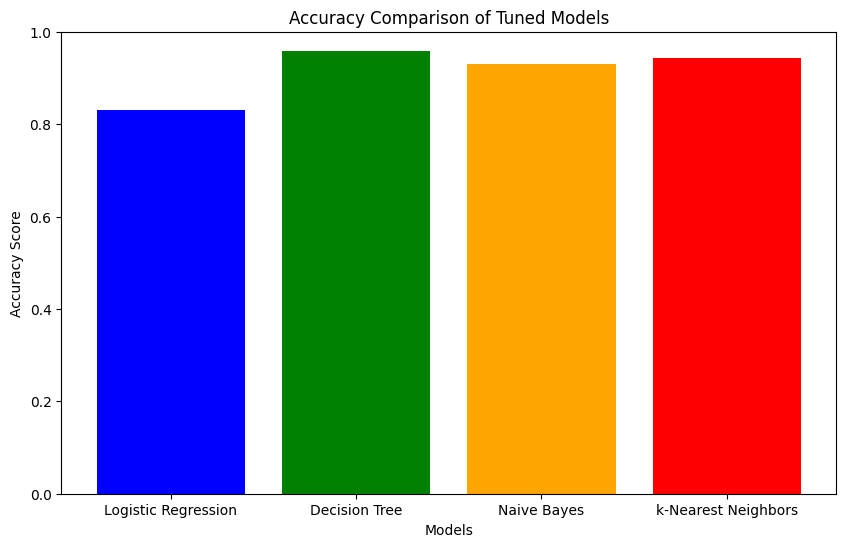

In [41]:
# Dictionary of models
models = [
    'Logistic Regression',
    'Decision Tree',
    'Naive Bayes',
    'k-Nearest Neighbors'
]

# Store the accuracy scores for each model
accuracy_scores = []

for name in models:
    # Get the best-tuned model
    best_model = best_models.get(name)

    # Ensure the model is fitted before making predictions
    best_model.fit(X_train, y_train)

    # Evaluate the best model on the test set
    test_predictions = best_model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, test_predictions)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])
plt.title('Accuracy Comparison of Tuned Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

We can see that Decision Tree and K Nearest Neighbors have the closest and the highest accuracries among all of them, so we can look at the feature importance

### Feature Importance

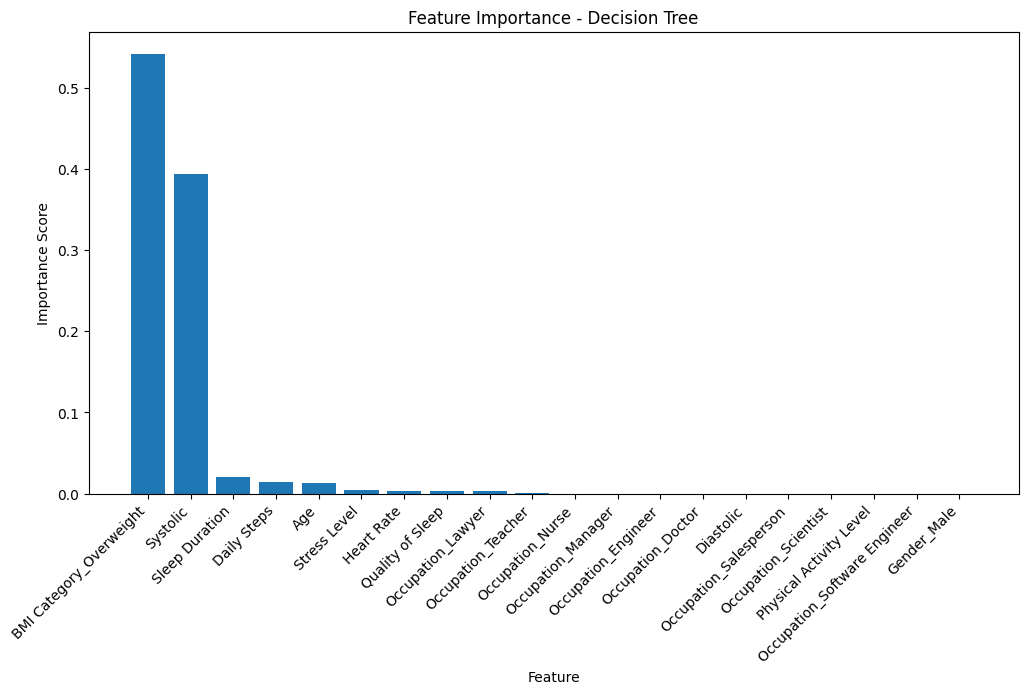

In [42]:
## Feature Importance 
# Assuming best_models is a dictionary containing the best-tuned models
# Replace this part with your actual best_models dictionary

# Get the best-tuned Decision Tree model
best_decision_tree_model = best_models.get('Decision Tree')

# Ensure the model is fitted before accessing feature importances
best_decision_tree_model.fit(X_train, y_train)

# Get feature importances
feature_importance_dt = best_decision_tree_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx_dt = np.argsort(feature_importance_dt)[::-1]

# Plotting the feature importances for Decision Tree
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx_dt)), feature_importance_dt[sorted_idx_dt], align="center")
plt.xticks(range(len(sorted_idx_dt)), feature_names[sorted_idx_dt], rotation=45, ha='right')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()

Text(0, 0.5, 'Feature 2')

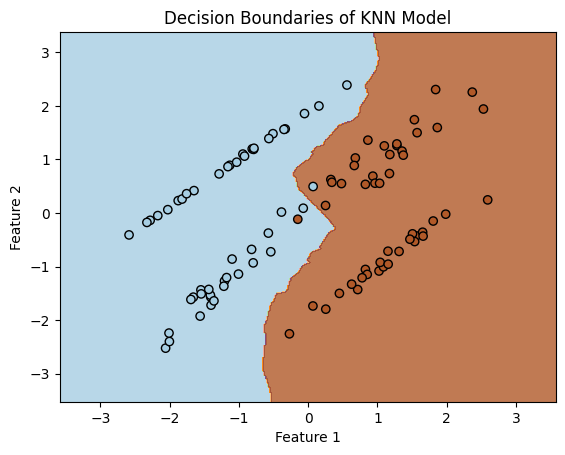

In [43]:
from sklearn.datasets import make_classification

# Assuming X_train, y_train are your training data
# Replace this part with your actual data
X_train, y_train = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Fit the KNN model (assuming you have a tuned KNN model)
best_knn_model = best_models.get('k-Nearest Neighbors')
best_knn_model.fit(X_train, y_train)

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Decision Boundaries of KNN Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

## Recommendations 
* Predicted Before that Overweight category is the best determinant of sleeping disorder, as it is an indicator that your health has to be taken seriously,
* Do this by increasing physical activity as physical activity, through increasing daily steps if you have a sedentary job. 
* Most of the isomniac jobs are within the medical field, since they walktheir isomnia does not effect their health, in which indicates that working out does help with managing the effects of the sleep disorder
* Diastolic Blood Pressure indicates higher breathing and that can result in higher cases of sleep apnea, reduce blood pressure by improving stress levels

<AxesSubplot: xlabel='Sleep Disorder', ylabel='BMI Category_Overweight'>

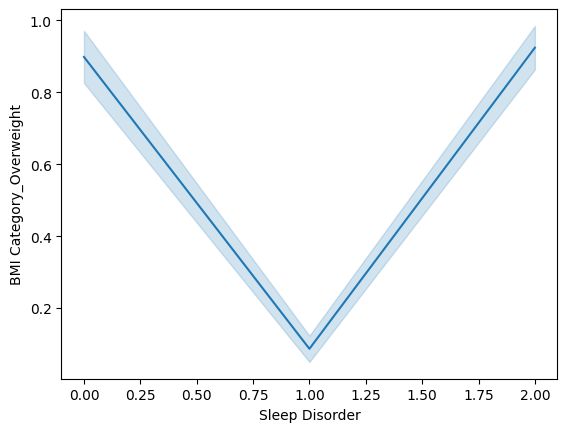

In [44]:
# Looking at BMI effect on sleep quality
sns.lineplot(data=df_dummies,x='Sleep Disorder',y='BMI Category_Overweight')

<AxesSubplot: xlabel='Quality of Sleep', ylabel='BMI Category_Overweight'>

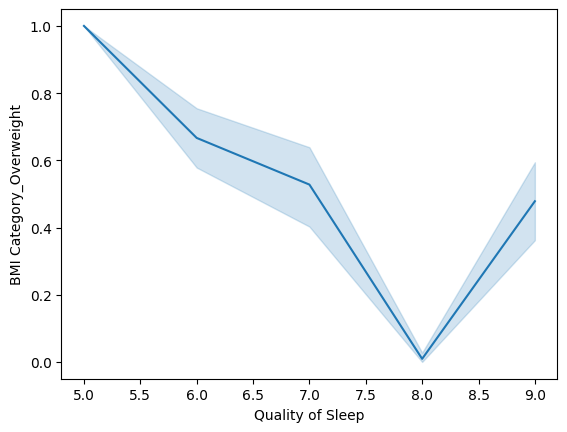

In [45]:
# Sleep Quality and Overweight Category
sns.lineplot(data=df_dummies,x='Quality of Sleep',y='BMI Category_Overweight')